In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [3]:
#Spotify Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [4]:
features.dtypes

SongID                        object
Performer                     object
Song                          object
spotify_genre                 object
spotify_track_id              object
spotify_track_preview_url     object
spotify_track_duration_ms    float64
spotify_track_explicit       float64
spotify_track_album           object
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
spotify_track_popularity     float64
dtype: object

In [5]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [6]:
#Convert 'WeekID' to DateTime Object & Check First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [6]:
bb100.dtypes

url                               object
WeekID                    datetime64[ns]
Week Position                      int64
Song                              object
Performer                         object
SongID                            object
Instance                           int64
Previous Week Position           float64
Peak Position                      int64
Weeks on Chart                     int64
dtype: object

In [7]:
def mean_over_time(feature_string, title_string, y_label_string, x_label_string = "Year"):
    
    bb100 = pd.read_csv('Hot Stuff.csv')
    bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
    keep = ['SongID', 'WeekID']
    bb100a = bb100[keep]
    
    features = pd.read_excel('Hot 100 Audio Features.xlsx')
    features_keep = ['SongID', feature_string]
    features_a = features[features_keep]
    
    bb100_features = pd.merge(bb100a, features_a, on='SongID', how='left')
    
    bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean().plot(legend=False)
    print(bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean().iloc[-1,0])
    
    
    plt.title(title_string, fontsize=20)
    plt.xlabel(x_label_string, fontsize=15)
    plt.ylabel(y_label_string, fontsize=15)
    plt.savefig('InsTime.png', pad_inches=2)
    plt.show();

In [56]:
def std_over_time(feature_string, title_string, y_label_string, x_label_string = "Year"):
    
    bb100 = pd.read_csv('Hot Stuff.csv')
    bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
    keep = ['SongID', 'WeekID']
    bb100a = bb100[keep]
    
    features = pd.read_excel('Hot 100 Audio Features.xlsx')
    features_keep = ['SongID', feature_string]
    features_a = features[features_keep]
    
    bb100_features = pd.merge(bb100a, features_a, on='SongID', how='left')
    
    bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).std().plot(legend=False)
    print(bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).std().iloc[-1,0])
    
    plt.title(title_string, fontsize=20)
    plt.xlabel(x_label_string, fontsize=15)
    plt.ylabel(y_label_string, fontsize=15)
    plt.savefig('DanceTime.png', pad_inches=2)
    plt.show();

In [30]:
def range_over_time(feature_string, 
                    y_label_string="Score", 
                    x_label_string = "Year"):
    
    bb100 = pd.read_csv('Hot Stuff.csv')
    bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
    keep = ['SongID', 'WeekID']
    bb100a = bb100[keep]
    
    features = pd.read_excel('Hot 100 Audio Features.xlsx')
    features_keep = ['SongID', feature_string]
    features_a = features[features_keep]
    
    bb100_features = pd.merge(bb100a, features_a, on='SongID', how='left')
    
    a = bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean()
    b = bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).std()
    lower = a[feature_string]-b[feature_string]/2
    upper = a[feature_string]+b[feature_string]/2

    plt.plot(a.index, a[feature_string])
    plt.fill_between(a.index, lower, upper, color='blue', alpha=0.3)
    
    plt.title(feature_string.capitalize() + " Over Time", fontsize=20)
    plt.xlabel(x_label_string, fontsize=15)
    plt.ylabel(y_label_string, fontsize=15)
    plt.savefig('DanceRange.png', pad_inches=2)
    plt.show();

    print(round(lower[-1],3), round(upper[-1],3))


0.577 0.726


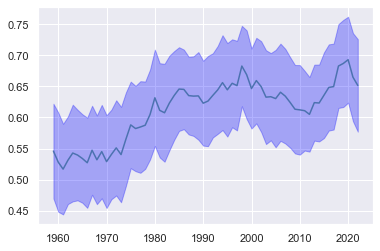

In [21]:
bb100 = pd.read_csv('Hot Stuff.csv')
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
keep = ['SongID', 'WeekID']
bb100a = bb100[keep]
    
features = pd.read_excel('Hot 100 Audio Features.xlsx')
features_keep = ['SongID', 'danceability']
features_a = features[features_keep]
    
bb100_features = pd.merge(bb100a, features_a, on='SongID', how='left')
    
a = bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean()
b = bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).std()
lower = a.danceability-b.danceability/2
upper = a.danceability+b.danceability/2

plt.plot(a.index, a.danceability)
plt.fill_between(a.index, lower, upper, color='blue', alpha=0.3);

print(round(lower[-1],3), round(upper[-1],3))

In [83]:
a

,danceability
WeekID,
1958-12-31,0.545860
1959-12-31,0.528111
1960-12-31,0.516852
1961-12-31,0.531123
1962-12-31,0.542766
...,...
2017-12-31,0.682885
2018-12-31,0.687011
2019-12-31,0.693093


In [84]:
b

,danceability
WeekID,
1958-12-31,0.152646
1959-12-31,0.159913
1960-12-31,0.145871
1961-12-31,0.140983
1962-12-31,0.155723
...,...
2017-12-31,0.135066
2018-12-31,0.140310
2019-12-31,0.138325


## Group A: Informative Trends

0.6516641689373297


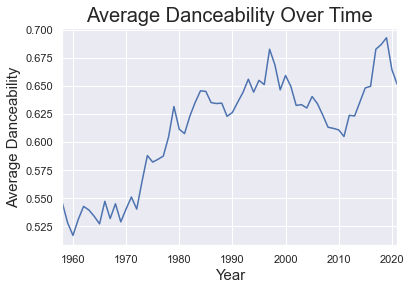

In [57]:
mean_over_time('danceability', 'Average Danceability Over Time', 'Average Danceability')

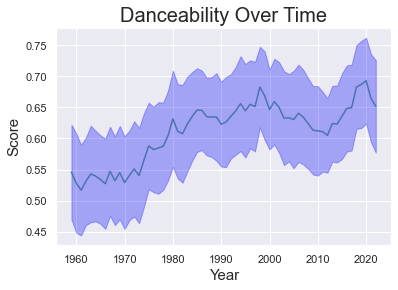

0.577 0.726


In [31]:
range_over_time('danceability')

0.14898917176376777


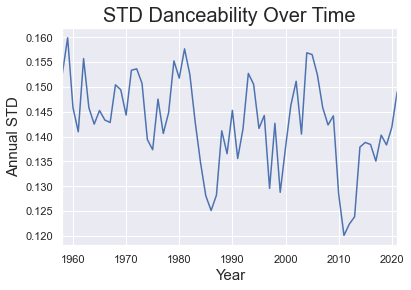

In [58]:
std_over_time('danceability', 'STD Danceability Over Time', 'Annual STD')

0.4989859673024523


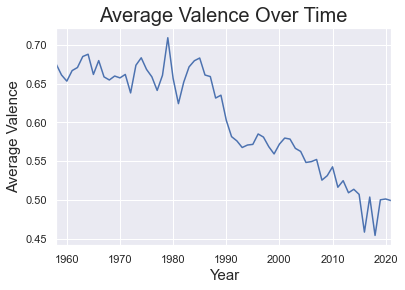

In [63]:
mean_over_time('valence', 'Average Valence Over Time', 'Average Valence')

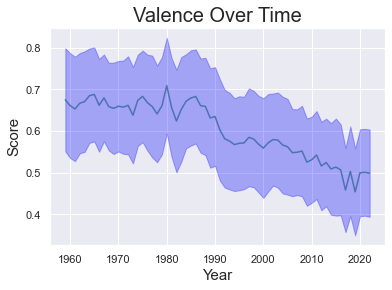

0.394 0.604


In [32]:
range_over_time('valence')

0.20969578460165675


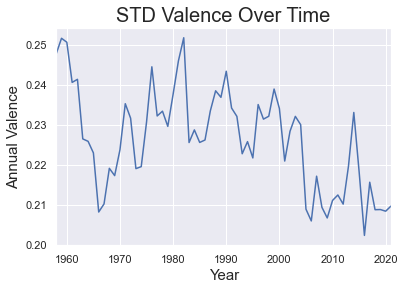

In [64]:
std_over_time('valence', 'STD Valence Over Time', 'Annual Valence')

0.10785572207084469


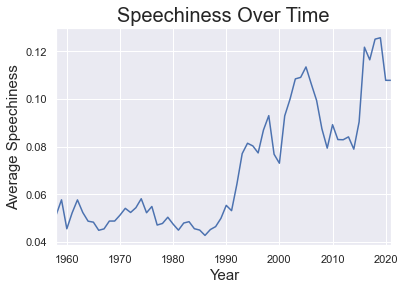

In [9]:
mean_over_time('speechiness', 'Speechiness Over Time', 'Average Speechiness')

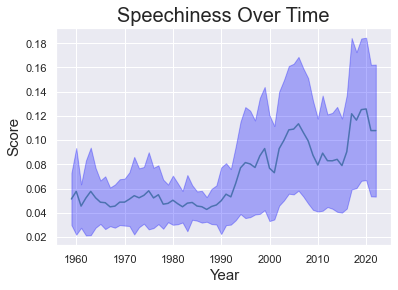

0.053 0.162


In [33]:
range_over_time('speechiness')

0.10899990551122092


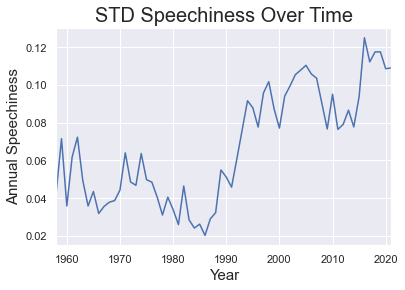

In [68]:
std_over_time('speechiness', 'STD Speechiness Over Time', 'Annual Speechiness')

0.003169610476839237


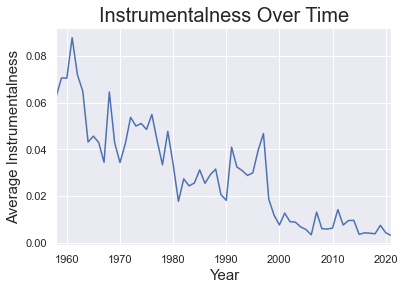

In [8]:
mean_over_time('instrumentalness', 'Instrumentalness Over Time', 'Average Instrumentalness')

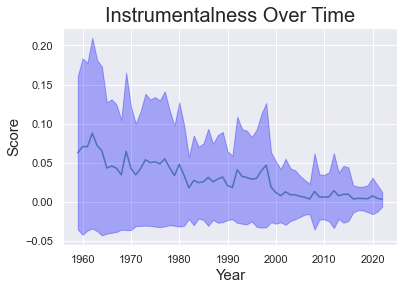

-0.006 0.012


In [35]:
range_over_time('instrumentalness')

0.018605889993207333


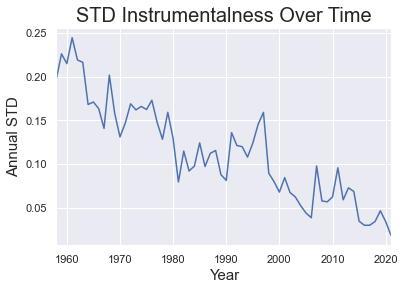

In [69]:
std_over_time('instrumentalness', 'STD Instrumentalness Over Time', 'Annual STD')

0.5933036103542234


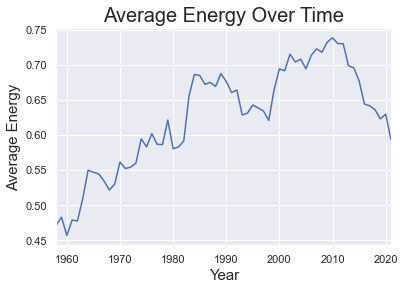

In [70]:
mean_over_time('energy', 'Average Energy Over Time', 'Average Energy')

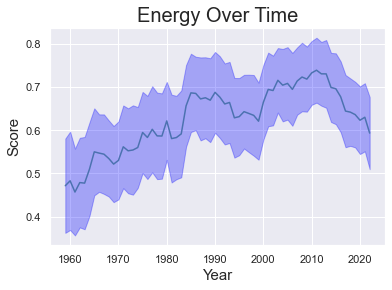

0.51 0.677


In [36]:
range_over_time('energy')

0.16718920207854313


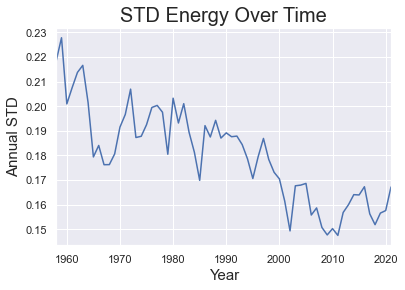

In [71]:
std_over_time('energy', 'STD Energy Over Time', 'Annual STD')

0.2890712683923706


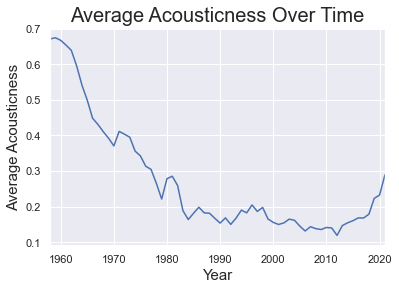

In [72]:
mean_over_time('acousticness', 'Average Acousticness Over Time', 'Average Acousticness')

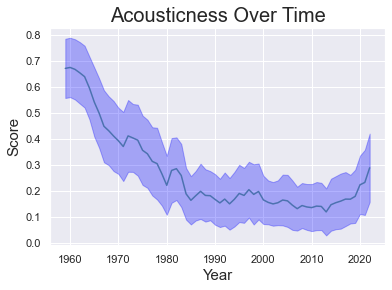

0.158 0.42


In [37]:
range_over_time('acousticness')

0.2624442632741666


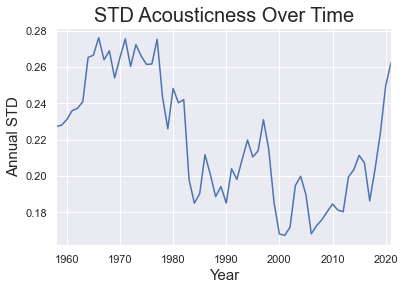

In [73]:
std_over_time('acousticness', 'STD Acousticness Over Time', 'Annual STD')

0.16053351498637602


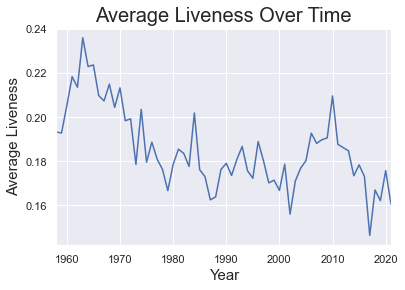

In [74]:
mean_over_time('liveness', 'Average Liveness Over Time', 'Average Liveness')

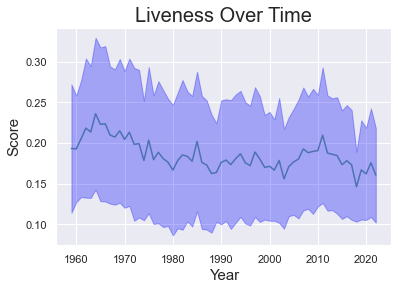

0.102 0.219


In [38]:
range_over_time('liveness')

0.11640728821337026


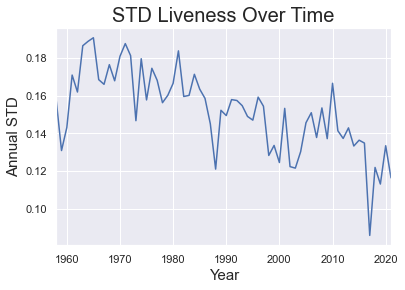

In [75]:
std_over_time('liveness', 'STD Liveness Over Time', 'Annual STD')

118.90274114441416


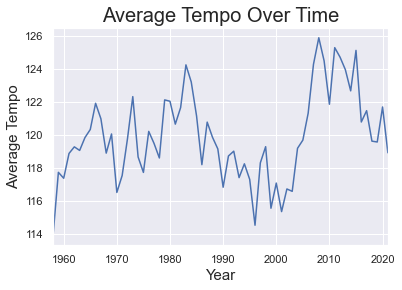

In [76]:
mean_over_time('tempo', 'Average Tempo Over Time', 'Average Tempo')

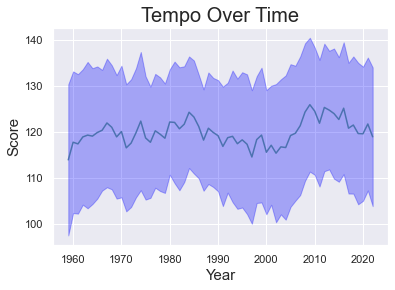

103.832 133.973


In [39]:
range_over_time('tempo')

30.140906022761865


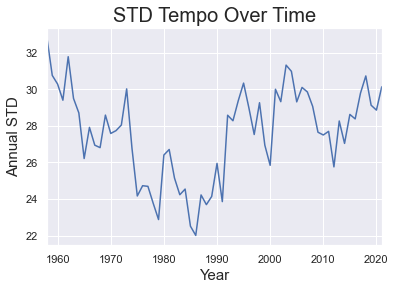

In [77]:
std_over_time('tempo', 'STD Tempo Over Time', 'Annual STD')

In [10]:
def two_feat_over_time(feature_string1, feature_string2, title_string = None):
    
    bb100 = pd.read_csv('Hot Stuff.csv')
    bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
    keep = ['SongID', 'WeekID']
    bb100a = bb100[keep]
    
    features = pd.read_excel('Hot 100 Audio Features.xlsx')
    features_keep = ['SongID', feature_string1, feature_string2]
    features_a = features[features_keep]
    
    bb100_features = pd.merge(bb100a, features_a, on='SongID', how='left')

    fig, ax1 = plt.subplots()
    fig.suptitle(title_string, fontsize=18)
    ax1.plot(bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean()[feature_string1],
            color='tab:red', label=feature_string1)
    ax1.set_xlabel('Year', fontsize=15)
    ax1.set_ylabel('Average ' + feature_string1.capitalize(), color='tab:red', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='tab:red')
    #ax1.legend()
    
    ax2=ax1.twinx()
    ax2.plot(bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean()[feature_string2],
            color='tab:blue', label=feature_string2)
    ax2.set_ylabel('Average ' + feature_string2.capitalize(), color='tab:blue', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    #ax2.legend()


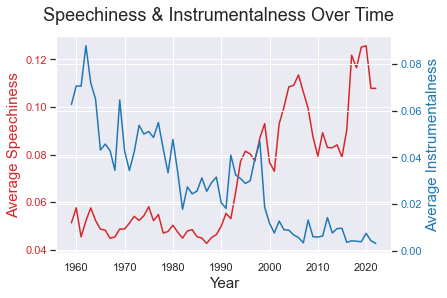

In [11]:
two_feat_over_time('speechiness', 'instrumentalness', 'Speechiness & Instrumentalness Over Time')

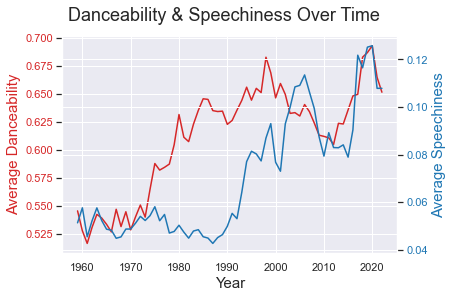

In [18]:
two_feat_over_time('danceability', 'speechiness', 'Danceability & Speechiness Over Time')

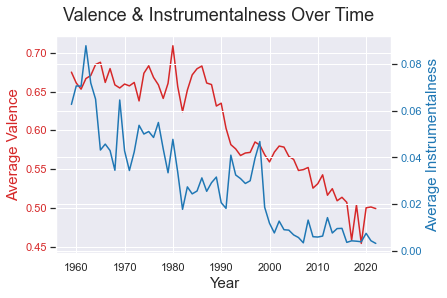

In [19]:
two_feat_over_time('valence', 'instrumentalness', 'Valence & Instrumentalness Over Time')

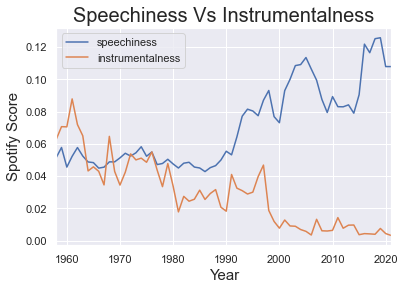

In [16]:
bb100 = pd.read_csv('Hot Stuff.csv')
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
keep = ['SongID', 'WeekID']
bb100a = bb100[keep]
    
features = pd.read_excel('Hot 100 Audio Features.xlsx')
features_keep = ['SongID', 'speechiness', 'instrumentalness']
features_a = features[features_keep]
    
bb100_features = pd.merge(bb100a, features_a, on='SongID', how='left')
    
a = bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean()

a.plot()
plt.title("Speechiness Vs Instrumentalness", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Spotify Score", fontsize=15)
#plt.savefig('DanceRange.png', pad_inches=2)
plt.show();


#b = bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).std()
#lower = a.danceability-b.danceability/2
#upper = a.danceability+b.danceability/2

#plt.plot(a.index, a.danceability)
#plt.fill_between(a.index, lower, upper, color='blue', alpha=0.3);

#print(round(lower[-1],3), round(upper[-1],3))

<AxesSubplot:xlabel='WeekID'>

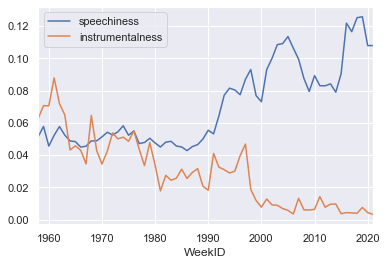

In [14]:
a.plot()

## Group B: Less Illustrative

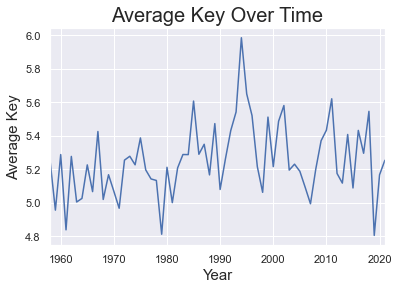

In [20]:
one_feature_over_time('key', 'Average Key Over Time', 'Average Key')

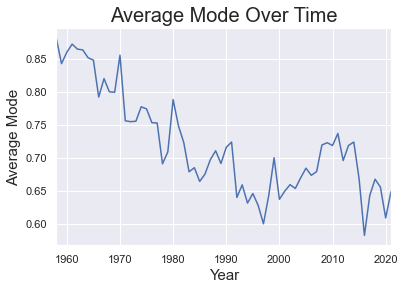

In [21]:
one_feature_over_time('mode', 'Average Mode Over Time', 'Average Mode')

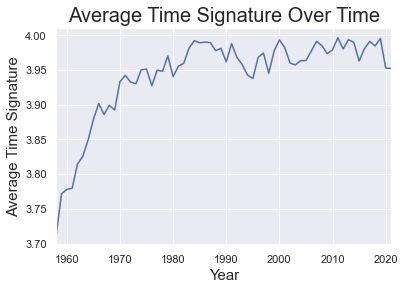

In [23]:
one_feature_over_time('time_signature', 'Average Time Signature Over Time', 'Average Time Signature')

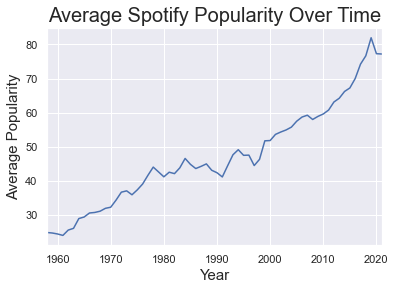

In [24]:
one_feature_over_time('spotify_track_popularity', 'Average Spotify Popularity Over Time', 'Average Popularity')